# Importando as bibliotecas e o csv 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dfCasos2024 = pd.read_csv('./dados_2024.csv', sep=';')
dfCasos2020 = pd.read_csv('./dados_2020.csv', sep=';')
dfObitos = pd.read_csv('./obitos.csv', sep=';')

dfCasosCidades2024 = dfCasos2024.loc[dfCasos2024['MUNICIPIO DE RESIDENCIA'].isin(['SALVADOR', 'ALAGOINHAS', 'FEIRA DE SANTANA'])]

dfCasosCidades2020 = dfCasos2020.loc[
  (dfCasos2020['MUNICIPIO DE RESIDENCIA'].isin(['SALVADOR', 'ALAGOINHAS', 'FEIRA DE SANTANA'])) & (dfCasos2020['IDADE EM ANOS'] < 110)
]

dfObitosCidades = dfObitos.loc[dfObitos['MUNICIPIO OCORRENCIA'].isin(['SALVADOR', 'ALAGOINHAS', 'FEIRA DE SANTANA'])]


# transformando data em datetime
dfCasosCidades2024['DATA DA NOTIFICACAO'] = pd.to_datetime(dfCasosCidades2024['DATA DA NOTIFICACAO'])

dfCasosCidades2020['DATA DA NOTIFICACAO'] = pd.to_datetime(dfCasosCidades2020['DATA DA NOTIFICACAO'])
dfObitosCidades['DATA OBITO'] = pd.to_datetime(dfObitosCidades['DATA OBITO'])


dfObitosCidades2024 = dfObitosCidades.loc[(dfObitosCidades['DATA OBITO'].dt.year == 2024)]
dfObitosCidades2020 = dfObitosCidades.loc[(dfObitosCidades['DATA OBITO'].dt.year == 2020)]


# Tratando os dados

In [139]:
#retirando datas fora do intervalo 2024
data_limite_2024 = pd.to_datetime('2024-01-01')
dfCasosCidades2024 = dfCasosCidades2024[dfCasosCidades2024['DATA DA NOTIFICACAO'] >= data_limite_2024]

#retirando datas fora do intervalo 2020
data_inicio_2020 = pd.to_datetime('2020-01-01')
data_fim_2020 = pd.to_datetime('2020-12-31')

print(dfCasosCidades2020.info())

dfCasosCidades2020 = dfCasosCidades2020[(dfCasosCidades2020['DATA DA NOTIFICACAO'] >= data_inicio_2020) & (dfCasosCidades2020['DATA DA NOTIFICACAO'] <= data_fim_2020)]

print(dfCasosCidades2020.info())




<class 'pandas.core.frame.DataFrame'>
Index: 194724 entries, 34 to 688439
Data columns (total 31 columns):
 #   Column                                                            Non-Null Count   Dtype         
---  ------                                                            --------------   -----         
 0   DATA DA NOTIFICACAO                                               194450 non-null  datetime64[ns]
 1   DOR DE GARGANTA                                                   191228 non-null  object        
 2   DISPNEIA                                                          191226 non-null  object        
 3   FEBRE                                                             191229 non-null  object        
 4   TOSSE                                                             191230 non-null  object        
 5   OUTROS                                                            191223 non-null  object        
 6   E PROFISSIONAL DE SAUDE?                                        

In [101]:
# nomes das coolunas
print(dfCasosCidades2024.columns)

print(dfCasosCidades2024['DATA DA NOTIFICACAO'].min())
print(dfCasosCidades2024['DATA DA NOTIFICACAO'].max())

print(dfCasosCidades2020['DATA DA NOTIFICACAO'].min())
print(dfCasosCidades2020['DATA DA NOTIFICACAO'].max())

Index(['DATA DA NOTIFICACAO', 'DOR DE GARGANTA', 'DISPNEIA', 'FEBRE', 'TOSSE',
       'OUTROS', 'E PROFISSIONAL DE SAUDE?', 'DATA DO INICIO DOS SINTOMAS',
       'DOENCAS RESPIRATORIAS CRONICAS DESCOMPENSADAS',
       'DOENCAS CARDIACAS CRONICAS', 'DIABETES',
       'DOENCAS RENAIS CRONICAS EM ESTAGIO AVANCADO (GRAUS 3, 4 OU 5)',
       'IMUNOSSUPRESSAO', 'GESTANTE DE ALTO RISCO',
       'PORTADOR DE DOENCAS CROMOSSOMICAS OU ESTADO DE FRAGILIDADE IMUNO',
       'CLASSIFICACAO FINAL', 'INVESTIGACAO CONCLUIDA', 'ESTADO DO TESTE',
       'CBO', 'DATA DA COLETA DO TESTE', 'IDADE EM ANOS', 'TIPO IDADE',
       'TIPO DE TESTE', 'RESULTADO DO TESTE', 'SEXO', 'BAIRRO',
       'ESTADO DE RESIDENCIA', 'MUNICIPIO DE RESIDENCIA', 'BANCO', 'RACA/COR',
       'EPIDEMIA'],
      dtype='object')
2024-01-01 00:00:00
2024-11-26 00:00:00
2020-01-04 00:00:00
2020-12-31 00:00:00


# Gráficos 2024

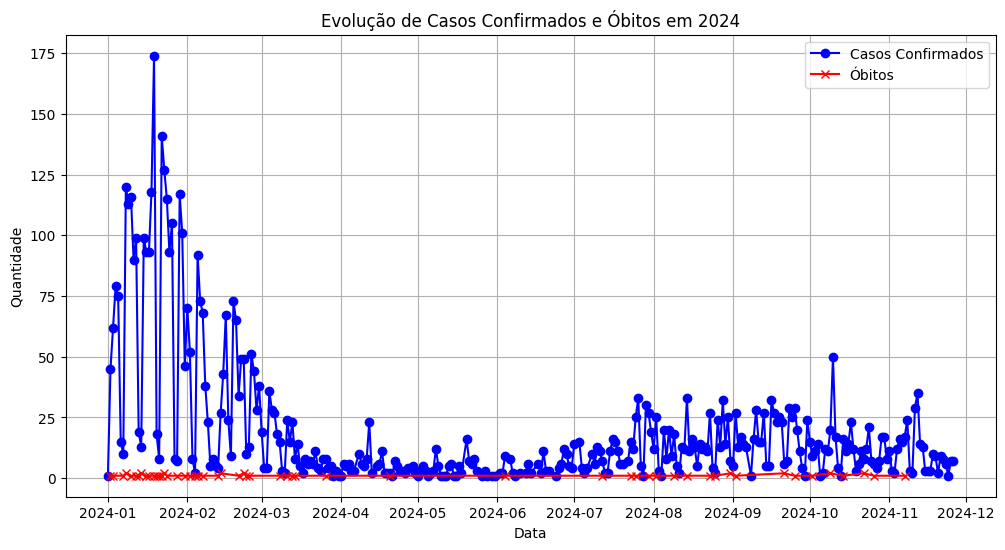

In [105]:
# gráfico de linha casos e óbitos 2024
casos_por_data = dfCasosCidades2024.groupby('DATA DA NOTIFICACAO').size()
obitos_diarios = dfObitosCidades2024.groupby('DATA OBITO').size()

plt.figure(figsize=(12, 6))
plt.plot(casos_por_data.index, casos_por_data.values, label='Casos Confirmados', color='blue', linestyle='-', marker='o')
plt.plot(obitos_diarios.index, obitos_diarios.values, label='Óbitos', color='red', linestyle='-', marker='x')
plt.title('Evolução de Casos Confirmados e Óbitos em 2024')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(True)
plt.show()

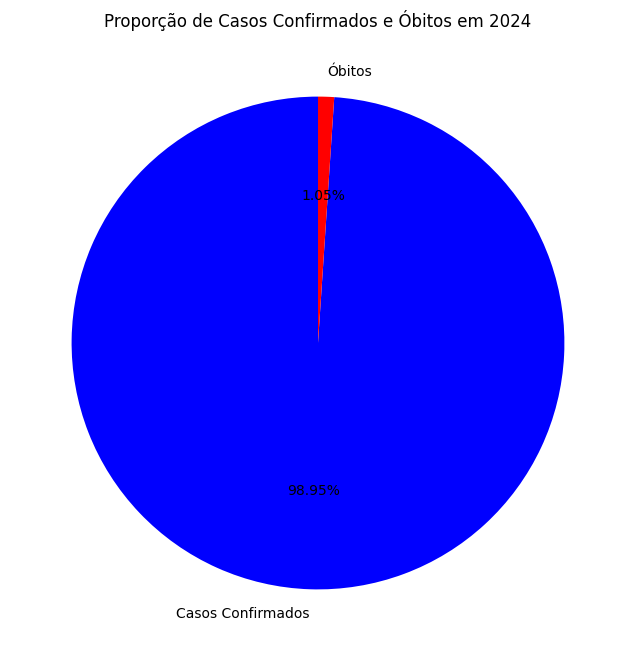

In [ ]:
# gráfico proporcional 2024
total_casos = dfCasosCidades2024.shape[0]
total_obitos = dfObitosCidades2024.shape[0]

plt.figure(figsize=(8, 8))
plt.pie([total_casos, total_obitos], labels=['Casos Confirmados', 'Óbitos'], autopct='%1.2f%%', startangle=90, colors=['blue', 'red'])
plt.title('Proporção de Casos Confirmados e Óbitos em 2024')
plt.ylabel('')
plt.show()


MUNICIPIO DE RESIDENCIA
SALVADOR            5374
FEIRA DE SANTANA     375
ALAGOINHAS           185
dtype: int64


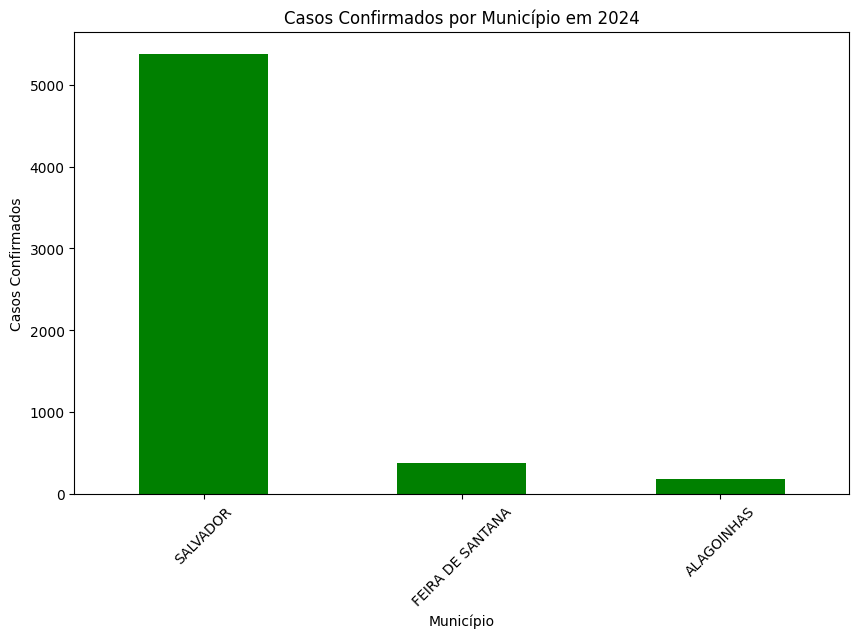

In [155]:
# gráfico de barra casos por cidade 2024
casos_por_municipio = dfCasosCidades2024.groupby('MUNICIPIO DE RESIDENCIA').size().sort_values(ascending=False).head(3)

print(casos_por_municipio)

plt.figure(figsize=(10, 6))
casos_por_municipio.plot(kind='bar', color='green')
plt.title('Casos Confirmados por Município em 2024')
plt.xlabel('Município')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)
plt.show()

MUNICIPIO OCORRENCIA
SALVADOR            48
FEIRA DE SANTANA    12
ALAGOINHAS           3
dtype: int64


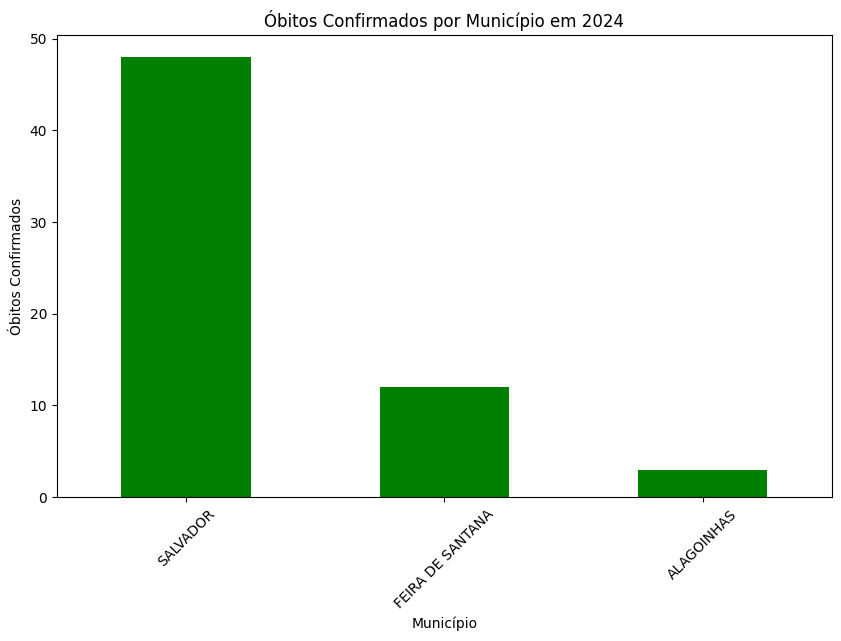

In [156]:
# gráfico de barra óbitos por cidade 2024
obitos_por_municipio = dfObitosCidades2024.groupby('MUNICIPIO OCORRENCIA').size().sort_values(ascending=False).head(3)

print(obitos_por_municipio)

plt.figure(figsize=(10, 6))
obitos_por_municipio.plot(kind='bar', color='green')
plt.title('Óbitos Confirmados por Município em 2024')
plt.xlabel('Município')
plt.ylabel('Óbitos Confirmados')
plt.xticks(rotation=45)
plt.show()

FAIXA_ETARIA
0-9         343
10-19       223
100-109       9
20-29       778
30-39      1017
40-49      1150
50-59       909
60-69       678
70-79       443
80-89       283
90-99       101
dtype: int64


C:\Users\Albie\AppData\Local\Temp\ipykernel_16672\2872078238.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCasosCidades2024['FAIXA_ETARIA'] = dfCasosCidades2024['IDADE EM ANOS'].apply(faixa_etaria)


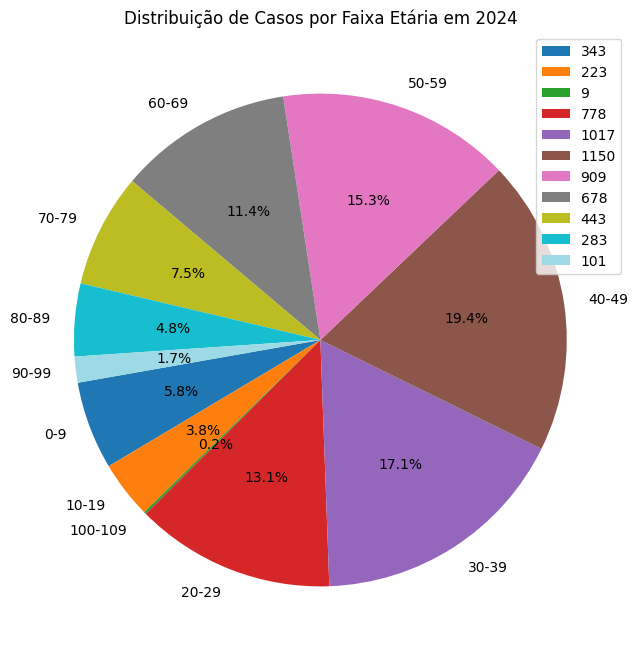

In [ ]:
#Gráfico de pizza por faixa etária 2024

def faixa_etaria(idade):
  return f"{(idade // 10) * 10}-{(idade // 10) * 10 + 9}"

dfCasosCidades2024['FAIXA_ETARIA'] = dfCasosCidades2024['IDADE EM ANOS'].apply(faixa_etaria)

casos_por_faixa = dfCasosCidades2024.groupby('FAIXA_ETARIA').size()

print(casos_por_faixa)

plt.figure(figsize=(8, 8))
casos_por_faixa.plot(kind='pie', autopct='%1.1f%%', startangle=190, colormap='tab20')
plt.title('Distribuição de Casos por Faixa Etária em 2024')
plt.ylabel('')
plt.legend(casos_por_faixa)
plt.show() 

FAIXA_ETARIA
0-9         7
100-109     1
40-49       1
50-59       6
60-69       9
70-79      14
80-89      13
90-99      12
dtype: int64


C:\Users\Albie\AppData\Local\Temp\ipykernel_16672\1347079005.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfObitosCidades2024['FAIXA_ETARIA'] = dfObitosCidades2024['IDADE'].apply(faixa_etaria)


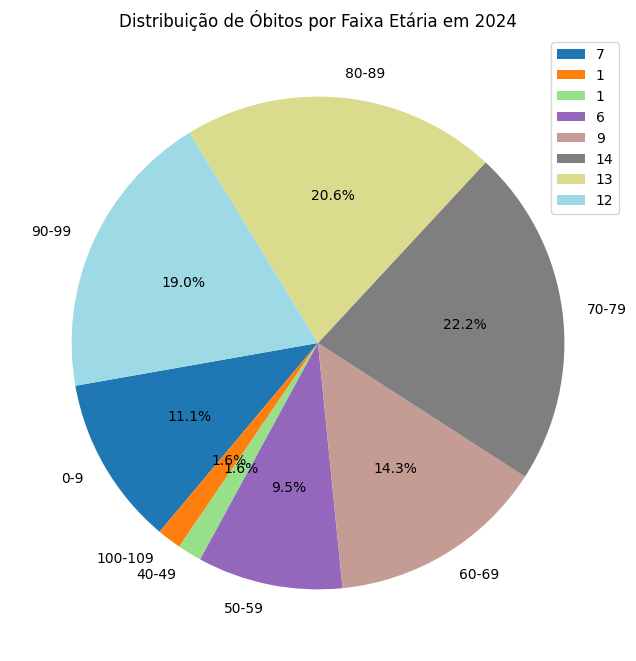

In [ ]:
#Gráfico de pizza por faixa etária 2024

def faixa_etaria(idade):
  return f"{int((idade // 10) * 10)}-{int((idade // 10) * 10 + 9)}"

dfObitosCidades2024['FAIXA_ETARIA'] = dfObitosCidades2024['IDADE'].apply(faixa_etaria)

obitos_por_faixa = dfObitosCidades2024.groupby('FAIXA_ETARIA').size()

print(obitos_por_faixa)

plt.figure(figsize=(8, 8))
obitos_por_faixa.plot(kind='pie', autopct='%1.1f%%', startangle=190, colormap='tab20')
plt.title('Distribuição de Óbitos por Faixa Etária em 2024')
plt.ylabel('')
plt.legend(obitos_por_faixa)
plt.show() 

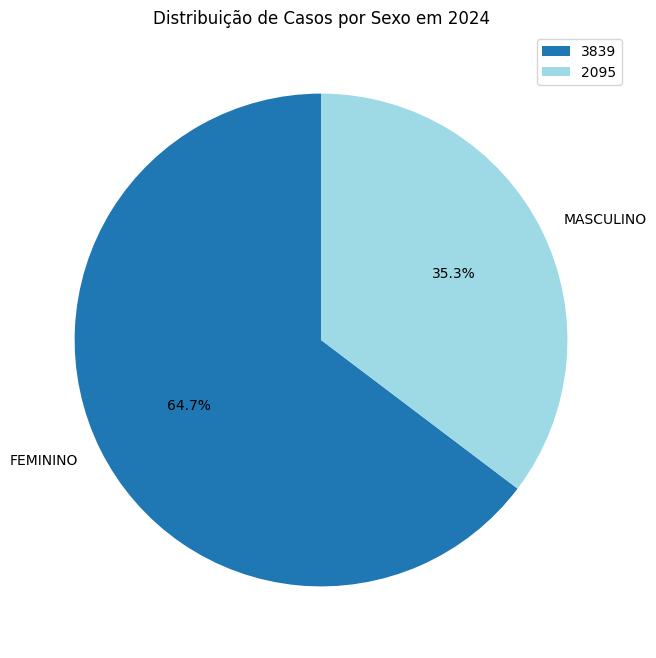

In [ ]:
#Gráfico de pizza casos por sexo 2024

casos_por_sexo = dfCasosCidades2024.groupby('SEXO').size()

plt.figure(figsize=(8, 8))
casos_por_sexo.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20')
plt.title('Distribuição de Casos por Sexo em 2024')
plt.ylabel('')
plt.legend(casos_por_sexo)
plt.show() 

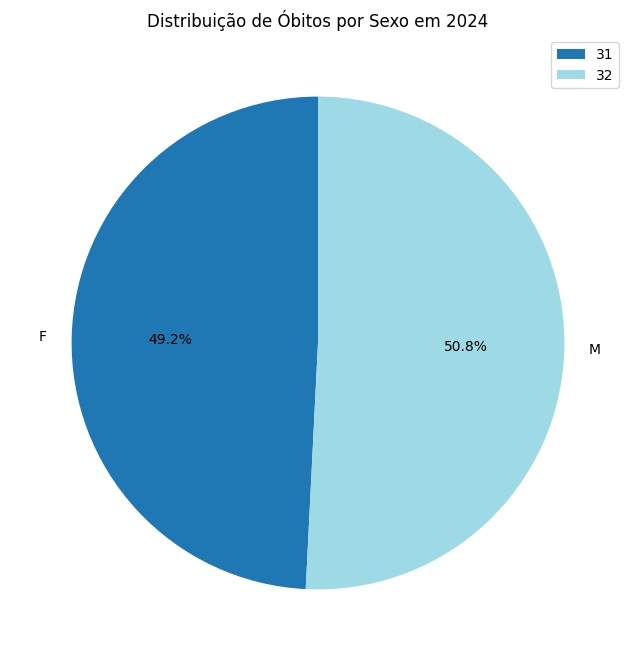

In [160]:
#Gráfico de pizza por sexo 2024

obitos_por_sexo = dfObitosCidades2024.groupby('SEXO').size()

plt.figure(figsize=(8, 8))
obitos_por_sexo.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20')
plt.title('Distribuição de Óbitos por Sexo em 2024')
plt.ylabel('')
plt.legend(obitos_por_sexo)
plt.show() 

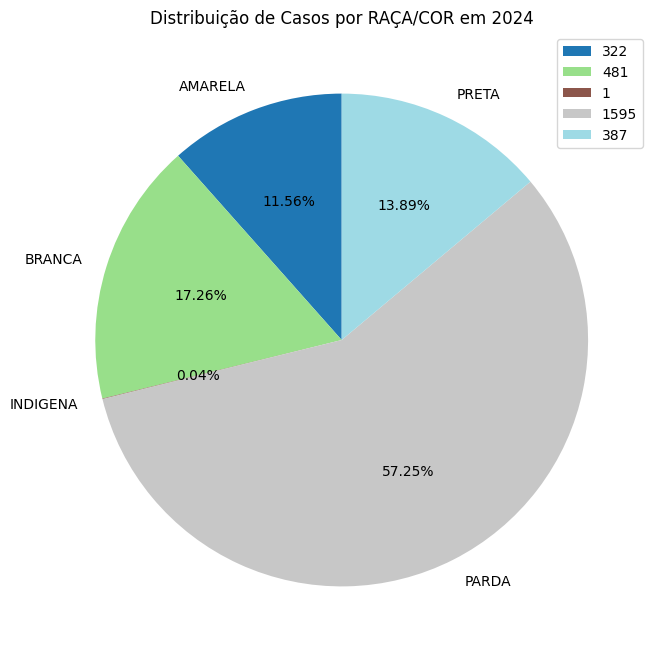

In [ ]:
#Gráfico de pizza por faixa sexo 2024

dfCasosCidades2024_filtrado = dfCasosCidades2024[~dfCasosCidades2024['RACA/COR'].isin(['IGNORADO', 'IGNORADA'])]
casos_por_cor = dfCasosCidades2024_filtrado.groupby('RACA/COR').size()

plt.figure(figsize=(8, 8))
casos_por_cor.plot(kind='pie', autopct='%1.2f%%', startangle=90, colormap='tab20')
plt.title('Distribuição de Casos por RAÇA/COR em 2024')
plt.ylabel('')
plt.legend(casos_por_cor)
plt.show() 

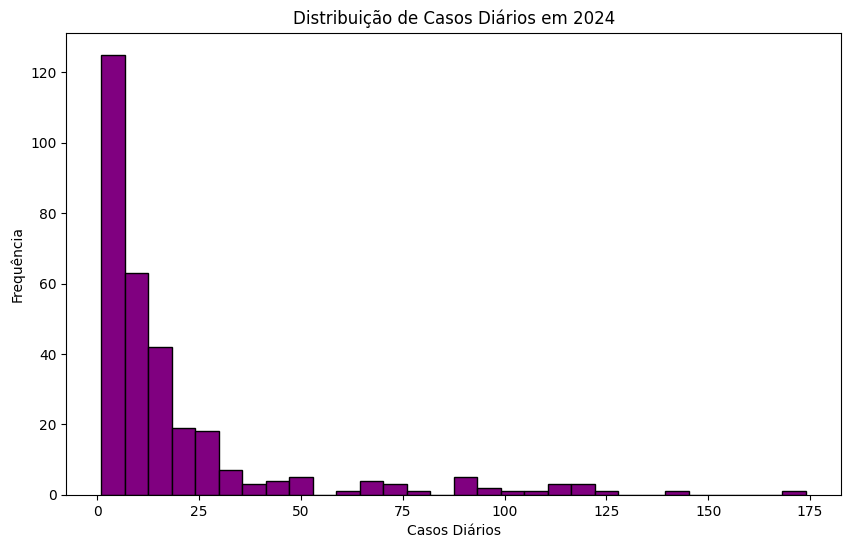

In [ ]:
#Histograma 2024
casos_por_data = dfCasosCidades2024.groupby('DATA DA NOTIFICACAO').size()

plt.figure(figsize=(10, 6))
plt.hist(casos_por_data, bins=30, color='purple', edgecolor='black')
plt.title('Distribuição de Casos Diários em 2024')
plt.xlabel('Casos Diários')
plt.ylabel('Frequência')
plt.show()

# Gráficos 2020

DATA OBITO
2020-03-28     2
2020-03-30     1
2020-04-02     2
2020-04-03     4
2020-04-06     2
              ..
2020-12-27    25
2020-12-28    25
2020-12-29    20
2020-12-30    28
2020-12-31    15
Length: 271, dtype: int64


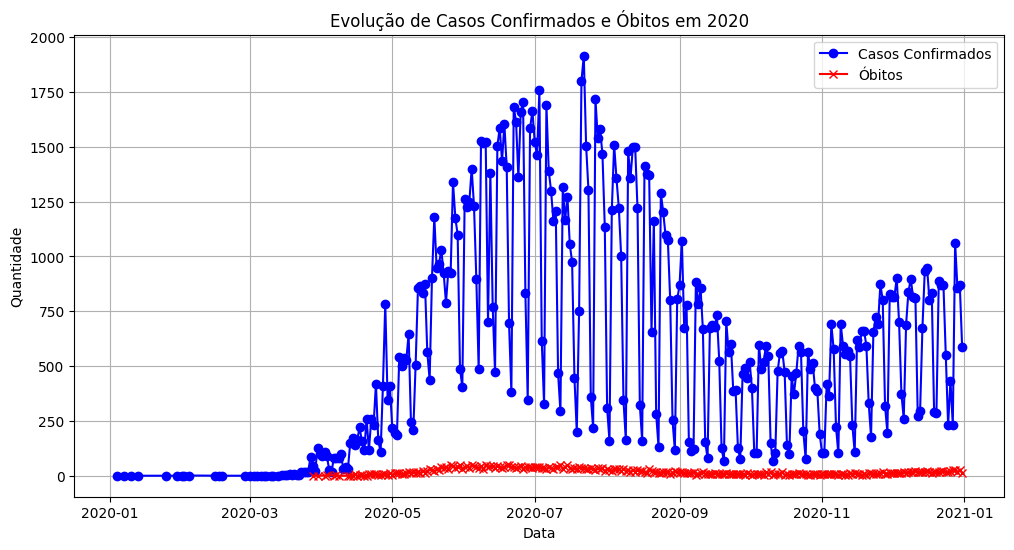

In [140]:
# gráfico de linha casos e óbitos 2020
casos_por_data = dfCasosCidades2020.groupby('DATA DA NOTIFICACAO').size()
obitos_diarios = dfObitosCidades2020.groupby('DATA OBITO').size()

print(obitos_diarios)

plt.figure(figsize=(12, 6))
plt.plot(casos_por_data.index, casos_por_data.values, label='Casos Confirmados', color='blue', linestyle='-', marker='o')
plt.plot(obitos_diarios.index, obitos_diarios.values, label='Óbitos', color='red', linestyle='-', marker='x')
plt.title('Evolução de Casos Confirmados e Óbitos em 2020')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(True)
plt.show()

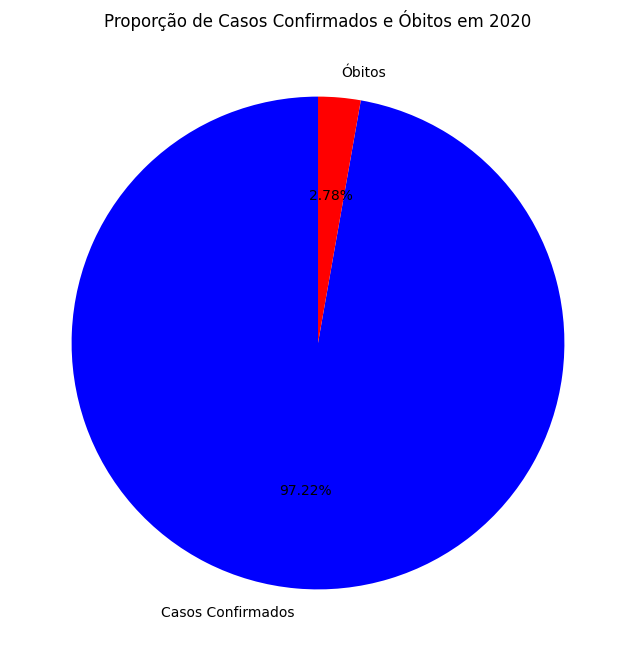

In [141]:
# gráfico proporcional 2020
total_casos = dfCasosCidades2020.shape[0]
total_obitos = dfObitosCidades2020.shape[0]

plt.figure(figsize=(8, 8))
plt.pie([total_casos, total_obitos], labels=['Casos Confirmados', 'Óbitos'], autopct='%1.2f%%', startangle=90, colors=['blue', 'red'])
plt.title('Proporção de Casos Confirmados e Óbitos em 2020')
plt.ylabel('')
plt.show()

MUNICIPIO DE RESIDENCIA
SALVADOR            146781
FEIRA DE SANTANA     33034
ALAGOINHAS            9428
dtype: int64


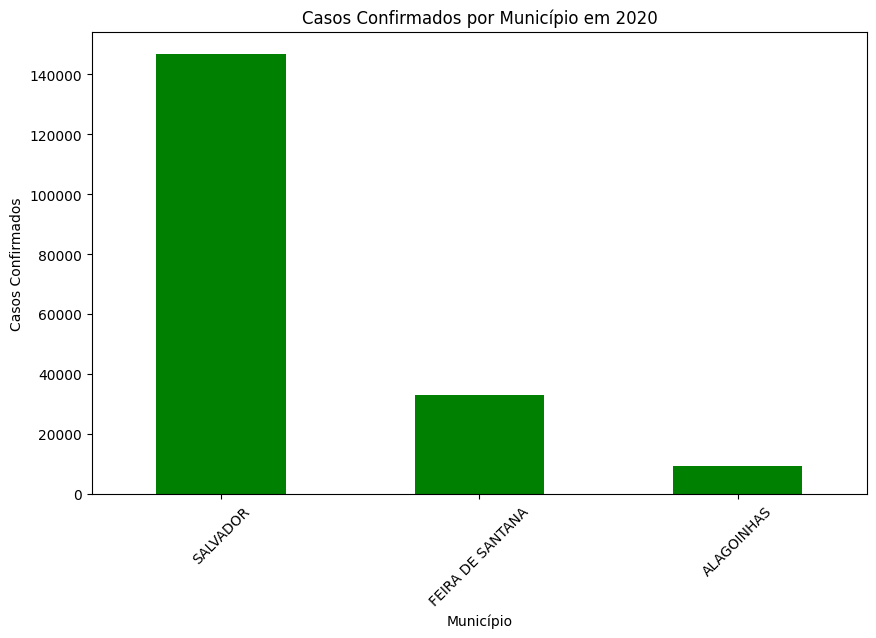

In [142]:
# gráfico de barra por cidade
casos_por_municipio = dfCasosCidades2020.groupby('MUNICIPIO DE RESIDENCIA').size().sort_values(ascending=False).head(3)

print(casos_por_municipio)

plt.figure(figsize=(10, 6))
casos_por_municipio.plot(kind='bar', color='green')
plt.title('Casos Confirmados por Município em 2020')
plt.xlabel('Município')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)
plt.show()

MUNICIPIO OCORRENCIA
SALVADOR            4854
FEIRA DE SANTANA     484
ALAGOINHAS            74
dtype: int64


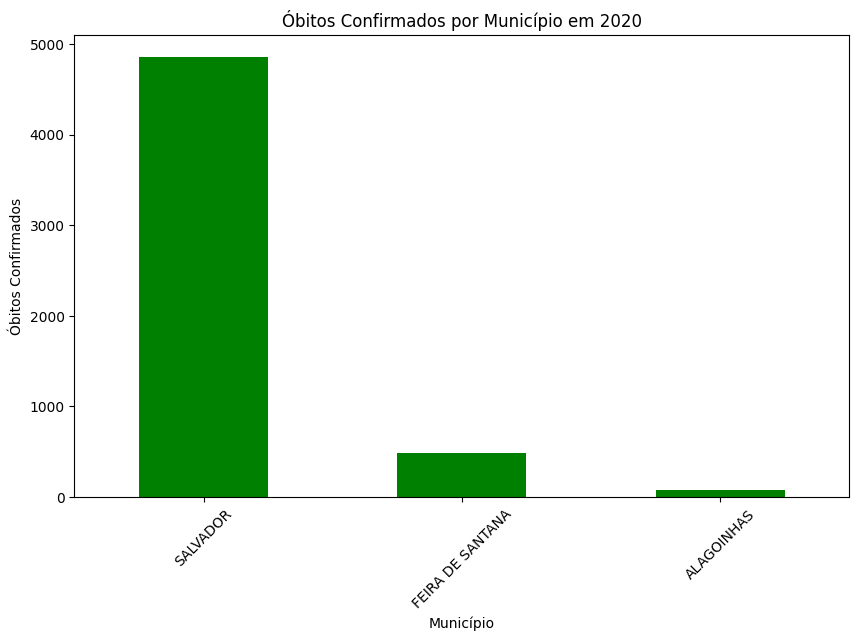

In [161]:
# gráfico de barra por cidade
obitos_por_municipio = dfObitosCidades2020.groupby('MUNICIPIO OCORRENCIA').size().sort_values(ascending=False).head(3)

print(obitos_por_municipio)

plt.figure(figsize=(10, 6))
obitos_por_municipio.plot(kind='bar', color='green')
plt.title('Óbitos Confirmados por Município em 2020')
plt.xlabel('Município')
plt.ylabel('Óbitos Confirmados')
plt.xticks(rotation=45)
plt.show()

FAIXA_ETARIA
0-9         5043
10-19       9655
100-109       54
20-29      30691
30-39      49656
40-49      42284
50-59      27607
60-69      14052
70-79       6317
80-89       3109
90-99        775
dtype: int64


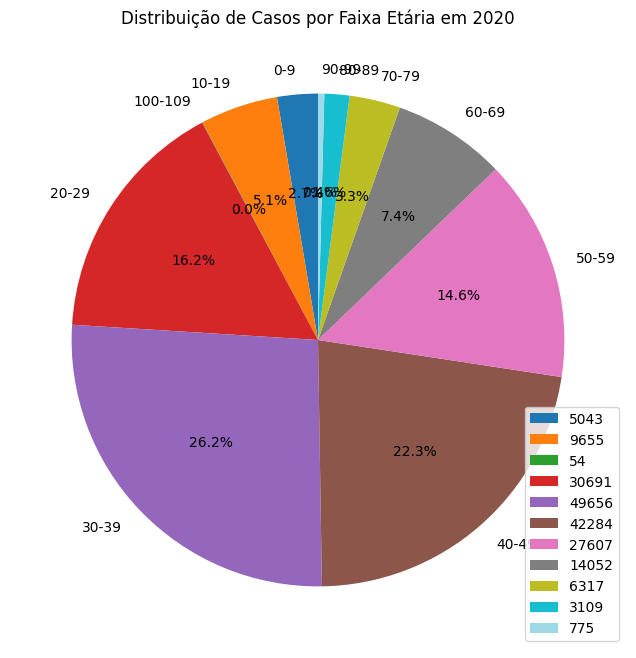

In [143]:
#Gráfico de pizza por faixa etária

def faixa_etaria(idade):
  return f"{int((idade // 10) * 10)}-{int((idade // 10) * 10 + 9)}"

dfCasosCidades2020['FAIXA_ETARIA'] = dfCasosCidades2020['IDADE EM ANOS'].fillna(0).apply(faixa_etaria)

casos_por_faixa = dfCasosCidades2020.groupby('FAIXA_ETARIA').size()

print(casos_por_faixa)

plt.figure(figsize=(8, 8))
casos_por_faixa.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20')
plt.title('Distribuição de Casos por Faixa Etária em 2020')
plt.ylabel('')
plt.legend(casos_por_faixa)
plt.show() 

FAIXA_ETARIA
0-9          27
10-19        17
100-109      23
110-119       2
20-29        77
30-39       172
40-49       407
50-59       711
60-69      1192
70-79      1279
80-89      1123
90-99       382
dtype: int64


C:\Users\Albie\AppData\Local\Temp\ipykernel_16672\3339455289.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfObitosCidades2020['FAIXA_ETARIA'] = dfObitosCidades2020['IDADE'].fillna(0).apply(faixa_etaria)


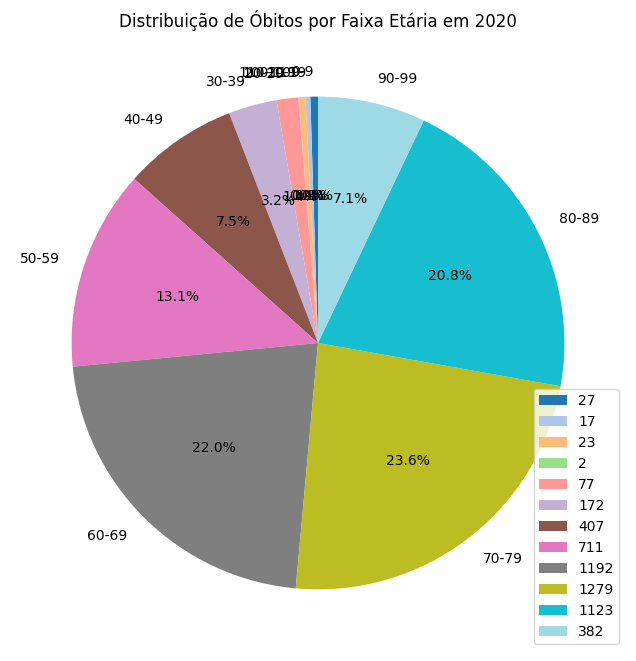

In [162]:
#Gráfico de pizza por faixa etária

def faixa_etaria(idade):
  return f"{int((idade // 10) * 10)}-{int((idade // 10) * 10 + 9)}"

dfObitosCidades2020['FAIXA_ETARIA'] = dfObitosCidades2020['IDADE'].fillna(0).apply(faixa_etaria)

obitos_por_faixa = dfObitosCidades2020.groupby('FAIXA_ETARIA').size()

print(obitos_por_faixa)

plt.figure(figsize=(8, 8))
obitos_por_faixa.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20')
plt.title('Distribuição de Óbitos por Faixa Etária em 2020')
plt.ylabel('')
plt.legend(obitos_por_faixa)
plt.show() 

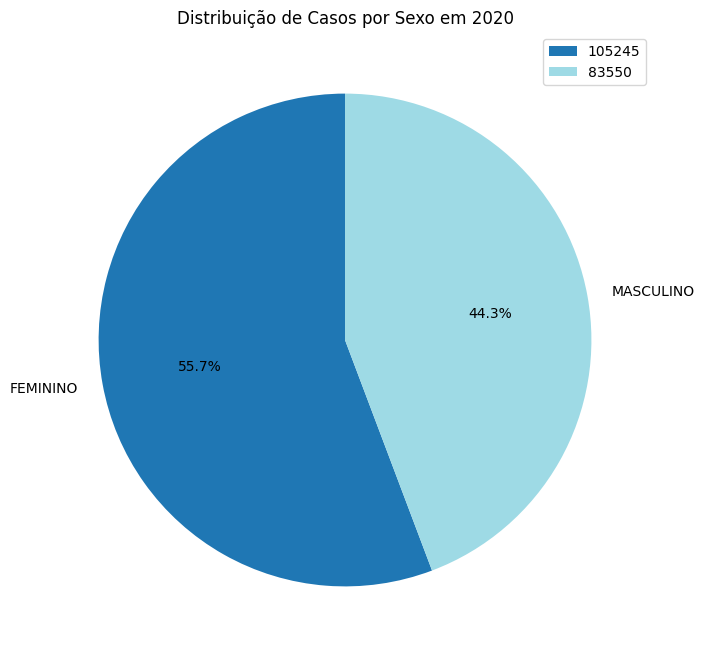

In [146]:
#Gráfico de pizza por faixa sexo 2020

dfCasosCidades2020_filtrado = dfCasosCidades2020[~dfCasosCidades2020['SEXO'].isin(['IGNORADO', 'IGNORADA', 'INDEFINIDO'])]
casos_por_sexo = dfCasosCidades2020_filtrado.groupby('SEXO').size()

plt.figure(figsize=(8, 8))
casos_por_sexo.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20')
plt.title('Distribuição de Casos por Sexo em 2020')
plt.ylabel('')
plt.legend(casos_por_sexo)
plt.show() 

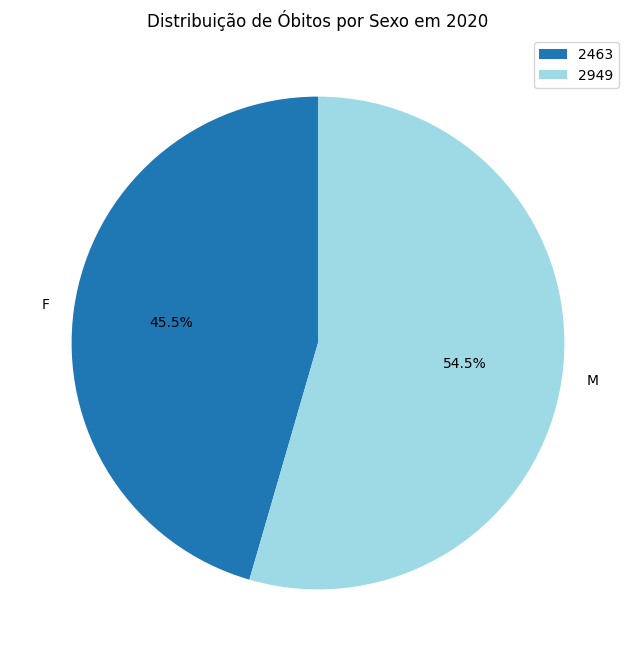

In [163]:
#Gráfico de pizza por faixa sexo 2020

dfObitosCidades2020_filtrado = dfObitosCidades2020[~dfObitosCidades2020['SEXO'].isin(['IGNORADO', 'IGNORADA', 'INDEFINIDO'])]
obitos_por_sexo = dfObitosCidades2020_filtrado.groupby('SEXO').size()

plt.figure(figsize=(8, 8))
obitos_por_sexo.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20')
plt.title('Distribuição de Óbitos por Sexo em 2020')
plt.ylabel('')
plt.legend(obitos_por_sexo)
plt.show() 

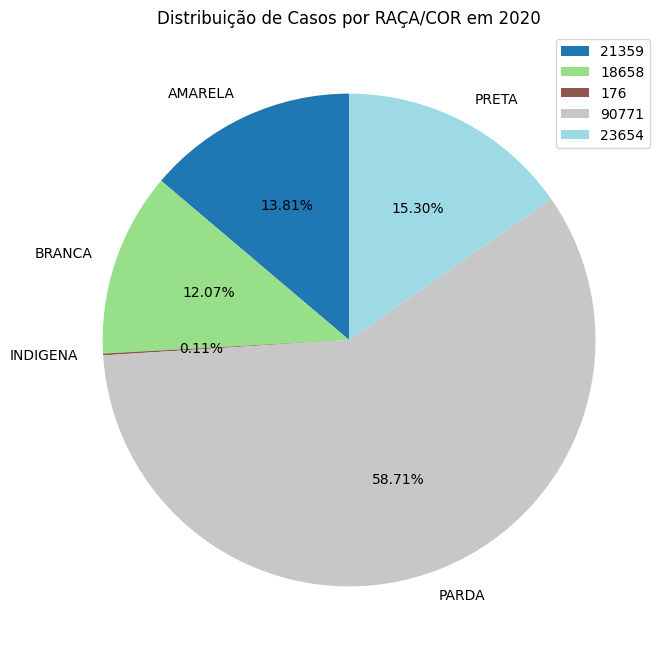

In [147]:
#Gráfico de pizza por faixa sexo 2020

dfCasosCidades2020_filtrado = dfCasosCidades2020[~dfCasosCidades2020['RACA/COR'].isin(['IGNORADO', 'IGNORADA'])]
casos_por_cor = dfCasosCidades2020_filtrado.groupby('RACA/COR').size()

plt.figure(figsize=(8, 8))
casos_por_cor.plot(kind='pie', autopct='%1.2f%%', startangle=90, colormap='tab20')
plt.title('Distribuição de Casos por RAÇA/COR em 2020')
plt.ylabel('')
plt.legend(casos_por_cor)
plt.show() 

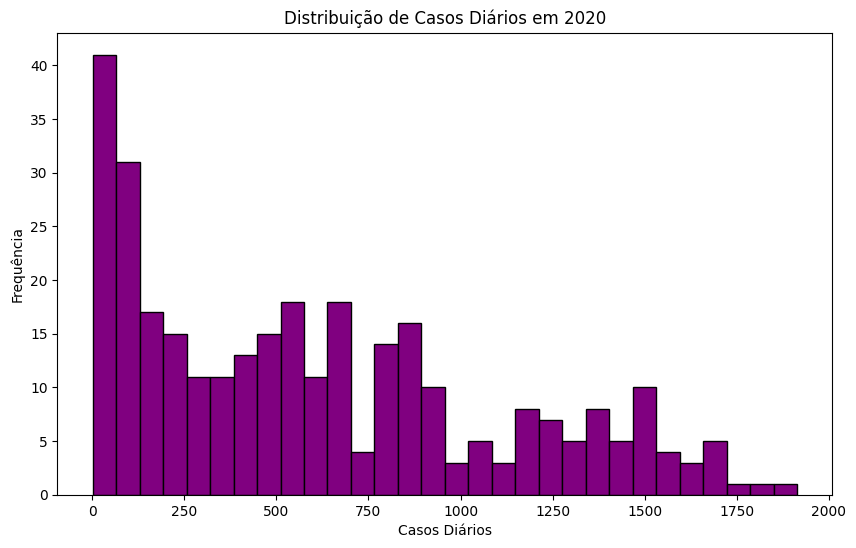

In [148]:
#Histograma 2020
casos_por_data = dfCasosCidades2020.groupby('DATA DA NOTIFICACAO').size()

plt.figure(figsize=(10, 6))
plt.hist(casos_por_data, bins=30, color='purple', edgecolor='black')
plt.title('Distribuição de Casos Diários em 2020')
plt.xlabel('Casos Diários')
plt.ylabel('Frequência')
plt.show()

# Gráficos mistos (2020 e 2024)

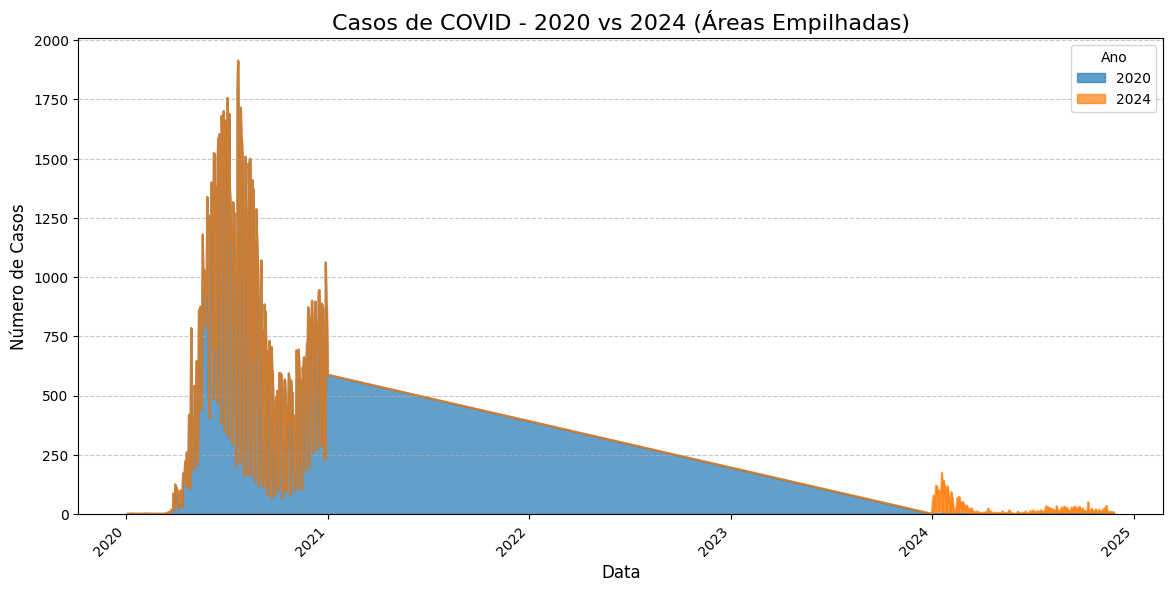

In [ ]:
# gráfico de áreas empilhadas

casos_2020 = dfCasosCidades2020.groupby('DATA DA NOTIFICACAO').size().reset_index(name='Casos')
casos_2020['Ano'] = 2020

casos_2024 = dfCasosCidades2024.groupby('DATA DA NOTIFICACAO').size().reset_index(name='Casos')
casos_2024['Ano'] = 2024

casos_combinados = pd.concat([casos_2020, casos_2024])

casos_pivot = casos_combinados.pivot(index='DATA DA NOTIFICACAO', columns='Ano', values='Casos').fillna(0)

# Plotando o gráfico de áreas empilhadas
casos_pivot.plot(kind='area', figsize=(14, 7), alpha=0.7)

plt.title('Casos de COVID - 2020 vs 2024 (Áreas Empilhadas)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.legend(title='Ano')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

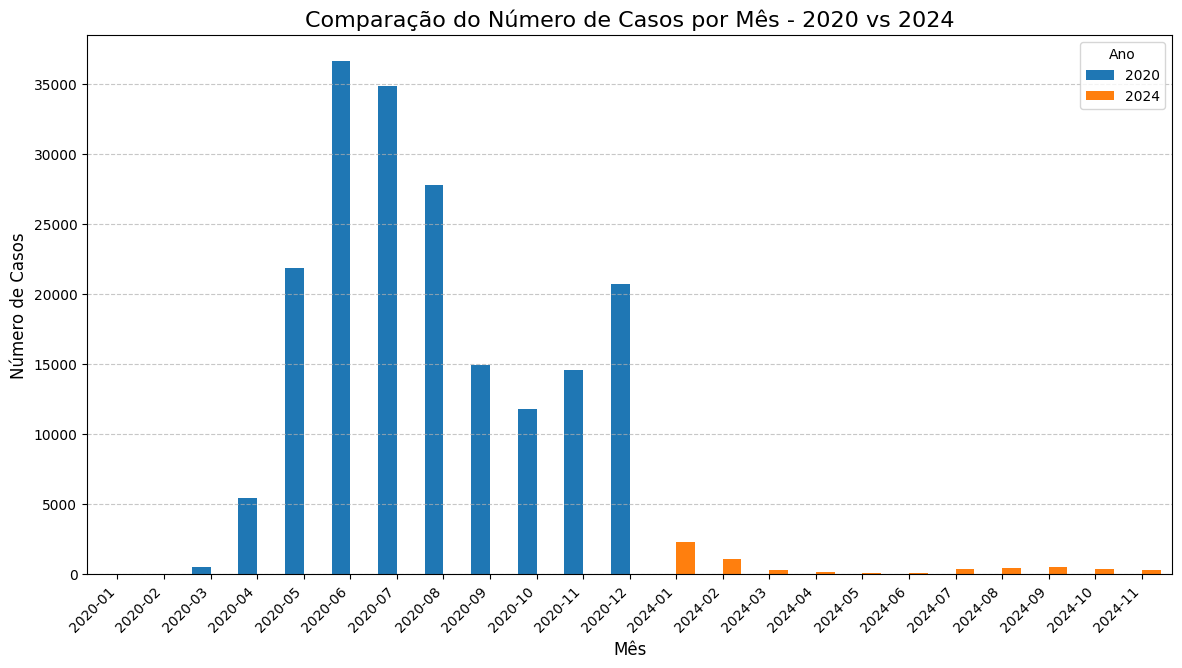

In [ ]:
# Gráfico de barras agrupadas

casos_2020_por_mes = dfCasosCidades2020.groupby(dfCasosCidades2020['DATA DA NOTIFICACAO'].dt.to_period('M')).size().reset_index(name='Casos')
casos_2020_por_mes['DATA DA NOTIFICACAO'] = casos_2020_por_mes['DATA DA NOTIFICACAO'].astype(str)

casos_2024_por_mes = dfCasosCidades2024.groupby(dfCasosCidades2024['DATA DA NOTIFICACAO'].dt.to_period('M')).size().reset_index(name='Casos')
casos_2024_por_mes['DATA DA NOTIFICACAO'] = casos_2024_por_mes['DATA DA NOTIFICACAO'].astype(str)

casos_2020_por_mes['Ano'] = 2020
casos_2024_por_mes['Ano'] = 2024

casos_combinados = pd.concat([casos_2020_por_mes, casos_2024_por_mes])

casos_por_mes_pivot = casos_combinados.pivot(index='DATA DA NOTIFICACAO', columns='Ano', values='Casos').fillna(0)

casos_por_mes_pivot.plot(kind='bar', figsize=(14, 7), width=0.8)

plt.title('Comparação do Número de Casos por Mês - 2020 vs 2024', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.legend(title='Ano')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()